In [2]:
% matplotlib inline
from stratified_bayesian_blocks.stratified_bayesian_blocks import stratified_bayesian_blocks
import numpy as np
from matplotlib import pyplot as plt
from astroML.density_estimation import bayesian_blocks
from scipy.stats.kde import gaussian_kde as kde
import seaborn as sns
sns.set_style("whitegrid")

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


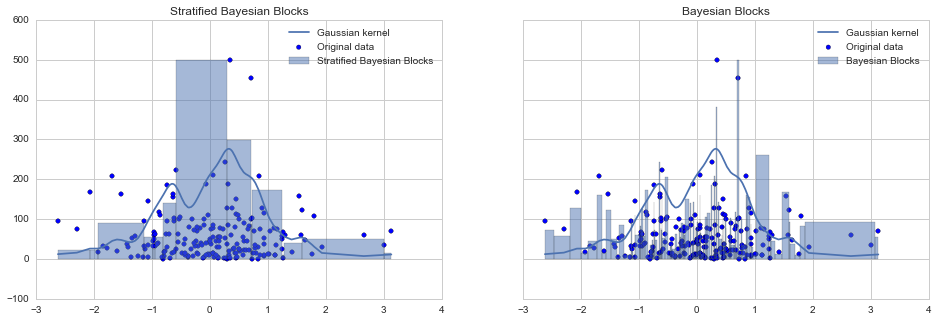

In [3]:
r = np.random.randn(200)
s = np.random.exponential(50, 200).astype(int)
x = np.repeat(r, s)

# Evaluate Stratified Bayesian Blocks, Bayesian Blocks, and a Gaussian Kernel on the data
sbb_bins = stratified_bayesian_blocks(x)
bb_bins = bayesian_blocks(x)
kernel = kde(x)
gaussian = kernel(np.sort(r))*np.max(s)

fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Stratified Bayesian Blocks
sbb_counts, sbb_bins = np.histogram(x, sbb_bins)
sbb_heights = np.max(s)*sbb_counts / np.max(sbb_counts).astype(float)
sbb_lefts = sbb_bins[:-1]
sbb_widths = sbb_bins[1:] - sbb_bins[:-1]
ax[0].bar(sbb_lefts, sbb_heights, width = sbb_widths, alpha=0.5, label="Stratified Bayesian Blocks")
ax[0].scatter(r, s, label="Original data")
ax[0].plot(np.sort(r), gaussian, label="Gaussian kernel")
ax[0].legend()
ax[0].set_title("Stratified Bayesian Blocks")


# Regular Bayesian Blocks
bb_counts, bb_bins = np.histogram(x, bb_bins)
bb_heights = np.max(s)*bb_counts / np.max(bb_counts).astype(float)
bb_lefts = bb_bins[:-1]
bb_widths = bb_bins[1:] - bb_bins[:-1]
ax[1].bar(bb_lefts, bb_heights, width = bb_widths, alpha=0.5, label="Bayesian Blocks")
ax[1].scatter(r, s, label="Original data")
ax[1].plot(np.sort(r), gaussian, label="Gaussian kernel")
ax[1].legend()
ax[1].set_title("Bayesian Blocks")

In [6]:
gaussian

array([  12.03650456,   15.8203512 ,   25.93114362,   26.12084862,
         29.98573126,   36.85425707,   45.47823925,   48.81867216,
         47.60875004,   43.0629191 ,   42.49916532,   42.12293827,
         42.48479563,   45.73193392,   52.83716231,   71.84928756,
         77.79695497,   78.00728451,   79.75114597,   93.75705076,
         95.40123543,   96.23192504,  116.97185814,  117.65551765,
        120.76953787,  121.12855294,  124.16821436,  127.42962877,
        128.04746118,  135.14373212,  137.38621952,  143.20244383,
        145.21559293,  152.75569541,  161.18327841,  162.11912659,
        165.51051443,  169.85490706,  171.19168987,  174.71756921,
        177.04693293,  177.7302365 ,  183.62216603,  186.37282034,
        188.38890071,  188.52129076,  188.37646593,  187.12762327,
        186.93238729,  186.14517979,  183.42527346,  183.37790609,
        174.94122774,  174.06510142,  167.29643537,  164.31130549,
        152.05685575,  141.20066066,  138.74861928,  138.28460